In [1]:
#basic libraries
import pandas as pd
import numpy as np

#visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

#Deep learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier


In [2]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train.shape   #(60000,28,28)=(totalcounts,no.ofrows,no.of columns)

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
#preprocessing
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [7]:
x_train /=255
x_test /=255

In [8]:
#creating artificial brain #model
#procedure
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))#convolutional 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))#neural network
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [9]:
#compile  #learning 
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x=x_train,y=y_train,epochs=10) #substitute #epoch-->one complete forward &backward process
#epoch-increases,accuracy-increase loss-decrease

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2101 - accuracy: 0.9376
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0821 - accuracy: 0.9753
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0560 - accuracy: 0.9814
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0439 - accuracy: 0.9858
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0342 - accuracy: 0.9892
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0285 - accuracy: 0.9904
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0262 - accuracy: 0.9912
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0226 - accuracy: 0.9923
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0197 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - l

In [10]:
  model.evaluate(x_test,y_test)  #testing
    #0.0605--loss #0.9860-accuracy

313/313 [==============================] - 1s 2ms/step - loss: 0.0640 - accuracy: 0.9853


[0.06402339786291122, 0.9853000044822693]

In [11]:

y_predict=model.predict(x_test)


In [12]:
y_predict

array([[2.37228379e-12, 2.58251688e-12, 2.47195285e-11, ...,
        1.00000000e+00, 8.23150489e-12, 3.87210086e-09],
       [1.42491444e-12, 4.94611356e-07, 9.99999523e-01, ...,
        4.08680480e-16, 1.41469825e-14, 7.48214995e-21],
       [4.24665685e-12, 9.99999762e-01, 2.97565306e-11, ...,
        2.11524011e-07, 3.28975354e-08, 7.74367376e-12],
       ...,
       [9.15918818e-27, 1.59961166e-15, 1.02641471e-18, ...,
        4.93734914e-11, 1.58616176e-11, 1.26057748e-10],
       [3.94679833e-17, 1.22812683e-15, 6.58981331e-22, ...,
        4.29550061e-17, 2.31699304e-09, 1.64447890e-18],
       [7.01028952e-17, 5.63302501e-20, 3.58724574e-17, ...,
        1.57349285e-20, 5.43651411e-15, 8.56536888e-24]], dtype=float32)

In [13]:
y_predicts=np.argmax(y_predict, axis=1)

In [14]:
y_predicts

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [17]:
y_test_digit_eval=np.argmax(y_predict, axis=1)

In [18]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

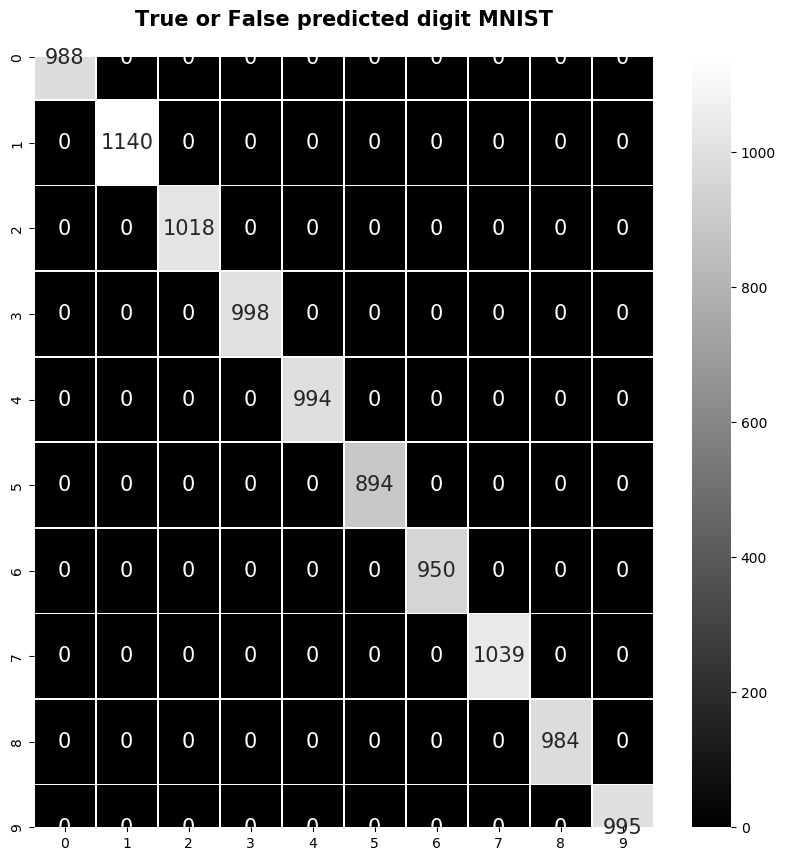

In [19]:
#Confusion matrix for Digit MNIST
con_mat=confusion_matrix(y_test_digit_eval,y_predicts)#--->actual,predicted
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()
# diagonal -correctly classified remaining wrongly classified
# 1119-correctly classified 1 as 1

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       988
           1       1.00      1.00      1.00      1140
           2       1.00      1.00      1.00      1018
           3       1.00      1.00      1.00       998
           4       1.00      1.00      1.00       994
           5       1.00      1.00      1.00       894
           6       1.00      1.00      1.00       950
           7       1.00      1.00      1.00      1039
           8       1.00      1.00      1.00       984
           9       1.00      1.00      1.00       995

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



6


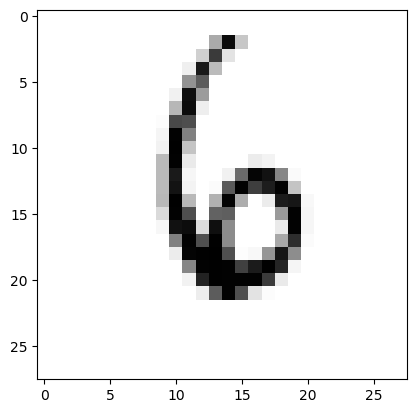

In [21]:
import matplotlib.pyplot as plt
image_index = 6900
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())